In [5]:
import h5py
import numpy as np

from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import hsv_to_rgb
import scipy

def bandwidth_wavelength_to_freq(lambdas):
    """
    make sure the input lambdas are in NANO meters!
    returns the badnwidth in angular freq in HERTZ
    """
    dlambda = lambdas[1]-lambdas[0] #bandwidth in wavelength in m
    number_of_wavelengths = len(lambdas)
    central_lambda = lambdas[int(number_of_wavelengths/2)]
    c = 299792458 # speed of light in m
    dw = (c * dlambda*10**(-9)) / ((central_lambda*10**(-9))**2 ) # bandwidth in frequency Hz
    dw = 2*np.pi*dw # angular freq = 2pi * f 
    return dw*10**-12

def group_delay_operator(U, lambdas):
    # slow
    TT_prime = []
    for n in range(1, len(lambdas)):
        TT_prime.append( U[n,:,:] @ U[n-1,:,:].T.conj() )
    return TT_prime

def eigvals_eigvecs(TT_prime):
    # less slow
    # TT_prime is list of n-1 matrices
    # find eigenvalues and vectors of each matrix
    # np.linalg.eig(matrix) does not necessarily order the eigvals
    eigvecs_list = []
    eigvals_list = []
    for matrix in TT_prime:
        eigvals, eigvecs = scipy.linalg.eig(matrix)
        #idx = eigvals.argsort()#[::-1] # sort eigvals and vecs in decending order by their real parts
        #idx = np.abs(np.angle(eigvals)).argsort()[::-1] # sort eigvals and vecs in decending order by their absolute values
        #eigvals = eigvals[idx]
        #eigvecs = eigvecs[:,idx]
        #eigvals = normalise_eigvals(eigvals) # normalise eigvals 
        #eigvals=np.abs(eigvals)*np.exp(1j*np.abs(np.angle(eigvals)))
        
        eigvals_list.append(eigvals)
        eigvecs_list.append(eigvecs)
    return eigvals_list, eigvecs_list

def normalise_eigvals(eigvals_list): # makes no difference to GD becuase normalisation cancels in the fraction
    for eigvals in eigvals_list:
        max = np.max(abs(eigvals))
        eigvals /= max
    return eigvals_list

def calc_group_delays(lambdas, eigvals_list):
    '''
    lambdas must be in nanometers
    '''
    # use i and i+1 eigvalue of each matrix to find GDs for that frequency
    dw = bandwidth_wavelength_to_freq(lambdas)
    GD_list = [] # differential group delay
    for eigvals in eigvals_list:
        group_delays = []
        for i in range( len(eigvals)-1):
            group_delays.append( np.abs( np.angle(np.array(eigvals[0]) / np.array(eigvals[i+1]))  / (dw ) ))  # GD in pico seconds 10^12
            #group_delays.append( np.abs( np.angle(eigvals[0]/eigvals[i])  / [1] ) )  # GD in pico seconds 10^12
            #group_delays.append( (( ( np.real(eigvals[i])- (np.real(eigvals[0]))) / dw))  )  # GD in pico seconds 10^12
            #group_delays.append( (( ( np.real(eigvals[i])) / dw))  ) 
        GD_list.append(group_delays)
    return GD_list

# Fibre Parameters:
- NA = 0.22
- L = 20m
- Core radius = 50 micron


In [3]:
f = h5py.File('C:\Users\BBQ Lab 3\Downloads\MatlabScripts/shem_test57.mat','r')



In [4]:
MSTM = np.load('Kbasis_TM_data_Nmodes_14_09_22_13_37187_.npy')
MSTM.shape
lambdas = np.arange(1540,1565,5)
#lambdas = np.array([[1540],[1545],[1550],[1555],[1560]])

lam = np.array([ [lambdas[i] ] for i in range(len(lambdas)) ])
dw = bandwidth_wavelength_to_freq(lambdas)
lam

array([[1540],
       [1545],
       [1550],
       [1555],
       [1560]])

In [5]:
MSTM_HG = f['U_tot_shem'][()].view(complex)
MSTM_LG = f['ULG_shem'][()].view(complex)

MMF = f['MMF']
Sec = f['Sec']
lambdas = MMF["/MMF/lda"][()] # lambdas is in meters here
lambdas = lambdas*10**9 # nano meters
dw = bandwidth_wavelength_to_freq(lambdas)

MSTM = MSTM_HG[0,:,:,:]

lambdas

array([[1545.2],
       [1547.6],
       [1550. ],
       [1552.4],
       [1554.8]])

(4, 109)


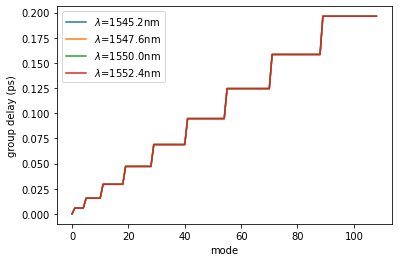

In [6]:
TT_prime = group_delay_operator(MSTM, lambdas) # slow
eigvals_list, eigvecs_list = eigvals_eigvecs(TT_prime) # less slow but still slow
GD_list = calc_group_delays(lambdas, eigvals_list) # shape = (wavelengths-1, modes-1, 1) returns GD in picoseconds 
GD_list = [ np.concatenate( GD, axis=0 ) for GD in GD_list ]
x_axis_length = int(np.floor(len(GD_list[0])/2))
GD_list = [ GD_list[i] for i in range(len(GD_list)) ] # only take 1st 50 eigvals (one polarisation)
GD_list = [ np.sort(GD) for GD in GD_list ] # descending order
GD_list = np.array(GD_list) 

GDs = GD_list
print(GDs.shape)
for i in range(len(GDs)):
    plt.plot( GDs[i], label=f'$\lambda$={np.round(lambdas[i][0],2)}nm') #[0:x_axis_length]
plt.xlabel('mode')
plt.ylabel('group delay (ps)')
#plt.title(f'GDs $\kappa=0$, $L={length}$m')
plt.legend(loc='upper left')
plt.show()   


In [7]:
shape(eigvecs_list)

(4, 110, 110)

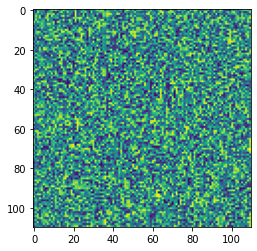

In [8]:
plt.imshow(np.angle(np.array(eigvecs_list)[2,:,:]))

# Joel Carpenter Comparison paper Figure:

In [6]:

from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [44]:
def bandwidth_wavelength_to_freq(lambdas):
    """
    make sure the input lambdas are in NANO meters!
    returns the badnwidth in angular freq in HERTZ
    """
    dlambda = lambdas[1]-lambdas[0] #bandwidth in wavelength in m
    number_of_wavelengths = len(lambdas)
    central_lambda = lambdas[int(number_of_wavelengths/2)]
    c = 299792458 # speed of light in m
    dw = (c * dlambda*10**(-9)) / ((central_lambda*10**(-9))**2 ) # bandwidth in frequency Hz
    dw = 2*np.pi*dw # angular freq = 2pi * f 
    return dw

def group_delay_operator(U, lambdas):
    # slow
    TT_prime = []
    for n in range(0, len(U[0,0,:])-1):
        #TT_prime.append( U[:,:,n] @ inv(U[:,:,n+1]) ) # from B Heffner paper
        TT_prime.append( U[:,:,n] @ U[:,:,n+1].T.conj() ) # conj transpose instead of inverse
    return TT_prime

def eigvals_eigvecs(TT_prime):
    # less slow
    # TT_prime is list of n-1 matrices
    # find eigenvalues and vectors of each matrix
    eigvecs_list = []
    eigvals_list = []
    for matrix in TT_prime:
        eigvals, eigvecs = np.linalg.eig(matrix)
        #eigvals = list(eigvals)
        eigvals_list.append(eigvals)
        eigvecs_list.append(eigvecs)
    return eigvals_list, eigvecs_list

def calc_group_delays(lambdas, eigvals_list):
    """ 
    requires lambdas to be in nanometers
    """
    # use first  eigvalue of each matrix to find GDs for that frequency
    dw = bandwidth_wavelength_to_freq(lambdas)
    GD_list = [] # differential group delay
    for eigvals in eigvals_list:
        group_delays = []
        for i in range( len(eigvals)):
            group_delays.append(( np.angle(eigvals[0] / eigvals[i]) / dw) *10**12)  # GD in pico seconds 10^12 # no absolute value?
        GD_list.append(group_delays)
    return GD_list

def mode_groups(M, L):
    # modes in same group have the same value of 2m+l
    # this returns list of all modes 2m+l value
    M_new = M.reshape(len(M))
    L_new = L.reshape(len(L))
    return 2*M_new + L_new

def normalise_eigvals(eigvals_list): # makes no difference to GD becuase normalisation cancels in the fraction
    for eigvals in eigvals_list:
        max = np.max(abs(eigvals))
        eigvals /= max
    return eigvals_list

def sort_n(n, arr):
    #arr = list(arr)
    new = arr[0:n] # # takes first n elements of array
    del arr[0:n]
    #arr = arr[n+1:] # delete from arr
    new.sort() # sorts them in ascending order
    new = np.flip(new) # flips to descending order
    return list(new) # return ordered n element

def order_gds_within_mode_groups(GD_list, mode_group_sizes):
    GD_list_ordered = []
    for GD in GD_list:
        ordered_GD = []
        for size in mode_group_sizes:
            new = sort_n(size, GD)  # for each mode group returns ordered eigvals
            ordered_GD.extend(new)
        GD_list_ordered.append(ordered_GD)
    return GD_list_ordered


def remove_outliers(n, arr, window):
    new = arr[0:n] # # takes first n elements of array
    del arr[0:n] # delete from arr - can only delete lists no np.arrays
    mean = np.mean(new)
    new = [ x if mean-window/2 <= x <= mean+window/2 else np.nan for x in new]
    #new = [ x for x in new if mean-window/2 <= x <= mean+window/2 ] # deletes any values out of range
    #new[new <= mean-window/2]=np.nan # turns values out of range into NaNs
    return list(new) 

def gds_no_outliers(GD_list_ordered, window):
    GD_list_no_outliers = []
    for GD in GD_list_ordered:
        remove_outliers_GDs = []
        for size in mode_group_sizes:
            new = remove_outliers(size, GD, window) # for each mode group returns ordered eigvals
            remove_outliers_GDs.extend(new)
        GD_list_no_outliers.append(remove_outliers_GDs)
    return GD_list_no_outliers


In [8]:
# import whatever MSTM you want:

# JOELS:
f_joel = h5py.File('C:\Users\BBQ Lab 3\Downloads\MatlabScripts\Fibre01_6MF_2014_10_16.mat','r')
U = f_joel['U'][()].view(complex)
M = f_joel['M'][()]
L = f_joel['L'][()]
odd_even = f_joel['odd_even'][()]
lambdas = f_joel['lambda'][()]
horz_vert = f_joel['horz_vert'][()]



OSError: Unable to open file (file signature not found)

In [46]:
lambdas = lambdas.reshape(len(*lambdas))
print(lambdas[0:3])

print(lambdas[1]-lambdas[0])
#lambdas = lambdas[::5] # every nth lambda

[1525.         1525.0793457  1525.15856934]
0.079345703125


wavelength is 1545.082763671875 meters


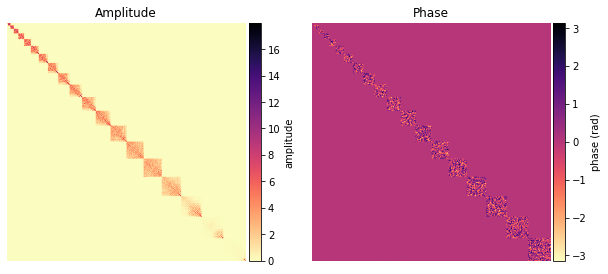

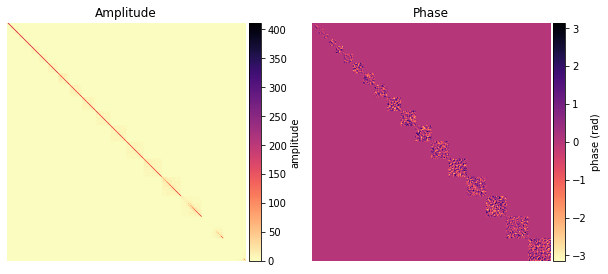

In [47]:
%matplotlib inline
print('wavelength is', lambdas[250],'meters')
plot_complex( U[:,:,250] )#
plt.show()

plot_complex( U[:,:,250]@U[:,:,250].T.conj() )
plt.show()

In [48]:
number_of_wavelengths = len(lambdas)
central_lambda = lambdas[ int(number_of_wavelengths/2)]

# just pick three mono TMs around the central wavelength
#U_calc = U[:,:, int(number_of_wavelengths/2)-1 : int(number_of_wavelengths/2)+2]

# calc all 512 TMs
U_calc = U

# calc group delay operator
TT_prime = group_delay_operator(U_calc, lambdas) # slow
# calc eigenvalues of GDO 


In [49]:
eigvals_list, eigvecs_list = eigvals_eigvecs(TT_prime) # less slow but still slow

In [50]:
# # normalise eigenvalues (makes no diff to GDs)
eigvals_list = normalise_eigvals(eigvals_list)

GD_list = calc_group_delays(lambdas, eigvals_list) # CHANGE THIS FUNCTION this creates a list of lists which works
number_of_mode_groups = int(mode_groups(M, L)[-1]) 
mode_group_sizes = 2*np.arange(1,number_of_mode_groups)
GD_list_ordered = order_gds_within_mode_groups(GD_list, mode_group_sizes)
GD_list_no_outliers = gds_no_outliers(GD_list_ordered, 10)

# plt.plot(GD_list_no_outliers[1])
# plt.ylim(-6,6)

In [51]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

print('index for 1560nm',np.where(lambdas == find_nearest(lambdas, 1560.0*10**-9)))
print('index for 1530nm',np.where(lambdas == find_nearest(lambdas, 1530.0*10**-9)))
dw = bandwidth_wavelength_to_freq(lambdas)
print('bandwidth in Hertz is', dw)

index for 1560nm (array([0]),)
index for 1530nm (array([0]),)
bandwidth in Hertz is 62567082042.09783


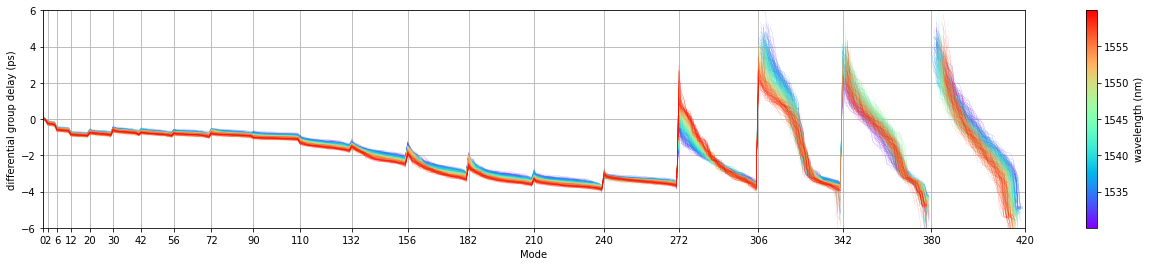

In [52]:
index_1530 = int(*np.where(lambdas == find_nearest(lambdas, 1530.0)))
index_1560 = int(*np.where(lambdas == find_nearest(lambdas, 1560.0)))

c = lambdas[index_1530:index_1560]
cmap = mpl.cm.get_cmap('rainbow', len(lambdas[index_1530:index_1560]))

fig, ax = plt.subplots(figsize=(22,4))
# Make dummie mappable
dummie_cax = ax.scatter(c, c, c=c, cmap=cmap)
# Clear axis
ax.cla()
for i in range(len(GD_list_no_outliers[index_1530:index_1560])):
    ax.plot(GD_list_no_outliers[index_1530+i], c=cmap(i), linewidth =0.1)
cbar = fig.colorbar(dummie_cax)
cbar.set_label('wavelength (nm)', rotation=90)
ax.set_ylabel('differential group delay (ps)')
ax.set_xlabel('Mode')
ax.set_ylim(-6,6)
ax.set_xlim(0,420)

gaps = np.linspace(2, 40, number_of_mode_groups-1)
ticks = [  sum(gaps[0:i]) for i in range(len(gaps)+1) ]
ax.set_xticks(ticks)
plt.grid()
#plt.savefig('DGD_joel.svg')